In [1]:
import tkinter as tk
from tkinter import Tk,filedialog,ttk
import pandas as pd 
import numpy as np
from collections import OrderedDict
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
import matplotlib.figure
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report,confusion_matrix
import matplotlib.pyplot as plt
from tkinter.filedialog import askopenfilename
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

In [2]:
filename=None
ErrorrateMeans=list()
AccuracyMeans=list()

In [3]:
def browse() :
	Tk().withdraw()
	global filename
	filename = askopenfilename()
	print (filename)

In [4]:
def Create_Input_Window():    
	input_window = tk.Toplevel(root)
	input_window.geometry("500x600")
	input_window.resizable(0, 0)
	
	def retrieve_input():
		if a1 :
		 inputframe =pd.DataFrame(
		 OrderedDict(
		{
		'UserID':[a1.get()],
		'No Of Abuse Report':[a2.get()],
		'Rejected Friend Requests':[a3.get()],
		'No Of Freind Requests That Are Not Accepted':[a4.get()],
		'No Of Friends':[a5.get()],
		'No Of Followers':[a6.get()],
		'No Of Likes To Unknown Account':[a7.get()],
		'No Of Comments Per Day':[a8.get()],
		}))
		inputframe = inputframe[['UserID', 'No Of Abuse Report','No Of Freind Requests That Are Not Accepted','No Of Friends','No Of Followers','No Of Likes To Unknown Account','No Of Comments Per Day']]
		print(inputframe.loc[0])
		Naive_Bayes_Manual_Input(inputframe)
		
	
	def show_predicted_label(label):
		if label == 1:
			account_type_label=tk.Label(input_window, text="Account Type : Fake").grid(row=24)
		else :
			account_type_label=tk.Label(input_window, text="Account Type : Not Fake").grid(row=24)
		
	def Linear_Svc_Manual_Input ():
		if  filename :
			print("here")
			if a1 :
			 inputframe =pd.DataFrame(
			 OrderedDict(
			{
			'UserID':[a1.get()],
			'No Of Abuse Report':[a2.get()],
			'Rejected Friend Requests':[a3.get()],
			'No Of Freind Requests That Are Not Accepted':[a4.get()],
			'No Of Friends':[a5.get()],
			'No Of Followers':[a6.get()],
			'No Of Likes To Unknown Account':[a7.get()],
			'No Of Comments Per Day':[a8.get()],
			}))
			inputframe = inputframe[['UserID', 'No Of Abuse Report','No Of Freind Requests That Are Not Accepted','No Of Friends','No Of Followers','No Of Likes To Unknown Account','No Of Comments Per Day']]
			print(inputframe.loc[0])
			
			df=pd.read_csv(filename) 
			msk = np.random.rand(len(df)) < 0.8
			train = df[msk]
			test = inputframe
			testing_data=test.values[:, 0:7]
			features = train.values[:, 0:7]
			labels   = train.values[:, 8].astype('int')
			model2 = LinearSVC()
			model2.fit(features,labels)
			predictions_model2 = model2.predict(testing_data)
			
			print('2.Linear SVC :\n')
			print('\n Predicted Class :',predictions_model2[0])
			show_predicted_label(predictions_model2[0])
			
	def Naive_Bayes_Manual_Input ():
		if  filename :
			print("here")
			
			if a1 :
			 inputframe =pd.DataFrame(
			 OrderedDict(
			{
			'UserID':[a1.get()],
			'No Of Abuse Report':[a2.get()],
			'Rejected Friend Requests':[a3.get()],
			'No Of Freind Requests That Are Not Accepted':[a4.get()],
			'No Of Friends':[a5.get()],
			'No Of Followers':[a6.get()],
			'No Of Likes To Unknown Account':[a7.get()],
			'No Of Comments Per Day':[a8.get()],
			}))
			inputframe = inputframe[['UserID', 'No Of Abuse Report','No Of Freind Requests That Are Not Accepted','No Of Friends','No Of Followers','No Of Likes To Unknown Account','No Of Comments Per Day']]
			print(inputframe.loc[0])
			
			
			df=pd.read_csv(filename) 
			msk = np.random.rand(len(df)) < 0.8
			train = df[msk]
			test = inputframe
			testing_data=test.values[:, 0:7]
			features = train.values[:, 0:7]
			labels   = train.values[:, 8].astype('int')
			model1 = MultinomialNB()
			model1.fit(features,labels)
			predictions_model1 = model1.predict(testing_data)
			
			print('\n1.Multinomial Naive Bayes :\n')
			print('\n Predicted Class :',predictions_model1[0])
			show_predicted_label(predictions_model1[0])		
			
	def Knn__Manual_Input():
		if  filename :
			print("here")
			
			if a1 :
			 inputframe =pd.DataFrame(
			 OrderedDict(
			{
			'UserID':[a1.get()],
			'No Of Abuse Report':[a2.get()],
			'Rejected Friend Requests':[a3.get()],
			'No Of Freind Requests That Are Not Accepted':[a4.get()],
			'No Of Friends':[a5.get()],
			'No Of Followers':[a6.get()],
			'No Of Likes To Unknown Account':[a7.get()],
			'No Of Comments Per Day':[a8.get()],
			}))
			inputframe = inputframe[['UserID', 'No Of Abuse Report','No Of Freind Requests That Are Not Accepted','No Of Friends','No Of Followers','No Of Likes To Unknown Account','No Of Comments Per Day']]
			print(inputframe.loc[0])
			
			
			df=pd.read_csv(filename) 
			msk = np.random.rand(len(df)) < 0.8
			train = df[msk]
			test = inputframe
			testing_data=test.values[:, 0:7]
			features = train.values[:, 0:7]
			labels   = train.values[:, 8].astype('int')
			model3 = KNeighborsClassifier(n_neighbors=3)
			model3.fit(features,labels)
			predictions_model3 = model3.predict(testing_data)
			print('3.K-Nearest Neighbors  :\n')
			print('\n Predicted Class :',predictions_model3[0])
			show_predicted_label(predictions_model3[0])		
			
	
		 
	tk.Label(input_window, text="Enter UserID").grid(row=0)
	tk.Label(input_window, text="Enter No Of Abuse Report").grid(row=3)
	tk.Label(input_window, text="Enter No Of Rejected Friend Requests").grid(row=5)
	tk.Label(input_window, text="Enter No Of Freind Requests That Are Not Accepted").grid(row=7)
	tk.Label(input_window, text="Enter No Of Friends").grid(row=9)
	tk.Label(input_window, text="Enter No Of Followers").grid(row=11)
	tk.Label(input_window, text="Enter No Of Likes To Unknown Account").grid(row=13)
	tk.Label(input_window, text="Enter No Of Comments Per Day").grid(row=15)
	
	
	a1 = tk.Entry(input_window)
	a2 = tk.Entry(input_window)
	a3 = tk.Entry(input_window)
	a4 = tk.Entry(input_window)
	a4 = tk.Entry(input_window)
	a5 = tk.Entry(input_window)
	a6 = tk.Entry(input_window)
	a7 = tk.Entry(input_window)
	a8 = tk.Entry(input_window)
	
	a1.grid(row=2, column=0)
	a2.grid(row=4, column=0)
	a3.grid(row=6, column=0)
	a4.grid(row=8, column=0)
	a5.grid(row=10, column=0)
	a6.grid(row=12, column=0)
	a7.grid(row=14, column=0)
	a8.grid(row=16, column=0)	
	
	tk.Label(input_window, 
		 text="Predict",
		 fg = "dark violet",
		 bg = "yellow2",
		 width=35,
		 height=1,
		 font = "Helvetica 15 bold italic").grid(row=32)
		   
	Naive_Bayes_button = tk.Button(input_window, 
					   text="Naive Bayes", 
					   fg="black",
					   bg="light steel blue",
					   width=10,
					   height=2,
					   command=Naive_Bayes_Manual_Input,
					   font = "Helvetica 10 bold italic",
					   )                 
	Naive_Bayes_button.place(relx=0.025, rely=0.8)   
	
    
	Linear_Svc_Button = tk.Button(input_window, 
					   text="Linear SVC",
					   fg="black",
					   bg="misty rose",
					   width=15,
					   height=2,
					   font = "Helvetica 10 bold italic",
					   command=Linear_Svc_Manual_Input,
					   )                 
	Linear_Svc_Button.place(relx=0.31, rely=0.8)   
	

	KNN_button = tk.Button(input_window, 
					   text="KNN",
					   fg="black",
					   bg="salmon1",
					   width=15,
					   height=2,
					   font = "Helvetica 10 bold italic",
					   command=Knn__Manual_Input,
					   )  
	KNN_button.place(relx=0.7, rely=0.8)   
	

In [5]:
def Naive_Bayes():
	if filename:
		global AccuracyMeans,ErrorrateMeans
		df=pd.read_csv(filename) 
		msk = np.random.rand(len(df)) < 0.8
		train = df[msk]
		test = df[~msk]
		testing_data=test.values[:, 0:7]
		testing_data_labels=test.values[:, 8]
		features = train.values[:, 0:7]
		labels   = train.values[:, 8].astype('int')
		model1 = MultinomialNB()
		model1.fit(features,labels)
		predictions_model1 = model1.predict(testing_data)
		
		accuracy=accuracy_score(testing_data_labels, predictions_model1)*100
		AccuracyMeans.append(accuracy)
		error_rate=100-accuracy
		ErrorrateMeans.append(error_rate)
		precision=precision_score(testing_data_labels, predictions_model1)*100
		recall=recall_score(testing_data_labels, predictions_model1)*100
		
		print('\n1.Multinomial Naive Bayes :\n')
		print('Confusion Matrix :')
		print(confusion_matrix(testing_data_labels, predictions_model1)) 
		print('Accuracy Is : '+str(accuracy )+' %')
		print('Error Rate Is : '+str(error_rate)+' %')
		print('Precision Is : '+str(precision)+' %')
		print('Recall Is : '+str(recall)+' %\n\n')

		labels = ['Error Rate', 'Accuracy ']
		sizes = [error_rate,accuracy]
		explode = (0, 0.1)  
		fig1, ax1 = plt.subplots()
		ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
				shadow=True, startangle=90) 
		plt.title('Naive Bayes Algorithm')
		ax1.axis('equal')  
		plt.tight_layout()
		plt.show()


In [6]:
def Linear_Svc():
	if filename:
		global AccuracyMeans,ErrorrateMeans
		df=pd.read_csv(filename) 
		msk = np.random.rand(len(df)) < 0.8
		train = df[msk]
		test = df[~msk]
		testing_data=test.values[:, 0:7]
		testing_data_labels=test.values[:, 8]
		features = train.values[:, 0:7]
		labels   = train.values[:, 8].astype('int')
		model2 = LinearSVC()
		model2.fit(features,labels)
		predictions_model2 = model2.predict(testing_data)
		
		accuracy=accuracy_score(testing_data_labels, predictions_model2)*100
		AccuracyMeans.append(accuracy)
		error_rate=100-accuracy
		ErrorrateMeans.append(error_rate)
		precision=precision_score(testing_data_labels, predictions_model2)*100
		recall=recall_score(testing_data_labels, predictions_model2)*100
		
		print('2.Linear SVC :\n')
		print('Confusion Matrix :')
		print(confusion_matrix(testing_data_labels, predictions_model2)) 
		print('Accuracy Is : '+str(accuracy )+' %')
		print('Error Rate Is : '+str(error_rate)+' %')
		print('Precision Is : '+str(precision)+' %')
		print('Recall Is : '+str(recall)+' %\n\n')

		labels = ['Error Rate', 'Accuracy ']
		sizes = [error_rate,accuracy]
		explode = (0, 0.1)  
		fig1, ax1 = plt.subplots()
		ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
				shadow=True, startangle=90) 

		plt.title('Linear SVC Algorithm')
		ax1.axis('equal')  
		plt.tight_layout()
		plt.show()

In [7]:
def Knn():
	if filename:
		global AccuracyMeans,ErrorrateMeans
		df=pd.read_csv(filename) 
		msk = np.random.rand(len(df)) < 0.8
		train = df[msk]
		test = df[~msk]
		testing_data=test.values[:, 0:7]
		testing_data_labels=test.values[:, 8]
		features = train.values[:, 0:7]
		labels   = train.values[:, 8].astype('int')

		model3 = KNeighborsClassifier(n_neighbors=3)
		model3.fit(features,labels)
		predictions_model3 = model3.predict(testing_data)
	
		accuracy=accuracy_score(testing_data_labels, predictions_model3)*100
		AccuracyMeans.append(accuracy)
		error_rate=100-accuracy
		ErrorrateMeans.append(error_rate)
		precision=precision_score(testing_data_labels, predictions_model3)*100
		recall=recall_score(testing_data_labels, predictions_model3)*100
		
		print('3.K-Nearest Neighbors  :\n')
		print('Confusion Matrix :')
		print(confusion_matrix(testing_data_labels, predictions_model3)) 
		print('Accuracy Is : '+str(accuracy )+' %')
		print('Error Rate Is : '+str(error_rate)+' %')
		print('Precision Is : '+str(precision)+' %')
		print('Recall Is : '+str(recall)+' %\n\n')

		labels = ['Error Rate', 'Accuracy ']
		sizes = [error_rate,accuracy]

		explode = (0, 0.1)  
		fig1, ax1 = plt.subplots()
		ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
				shadow=True, startangle=90) 

		plt.title('KNN Algorithm')
		ax1.axis('equal')  
		plt.tight_layout()
		plt.show()

In [8]:
def compare():
	
	N = 3
	ind = np.arange(N)
	width = 0.35
	p1 = plt.bar(ind, AccuracyMeans, width )
	p2 = plt.bar(ind, ErrorrateMeans, width,bottom=AccuracyMeans )
	plt.ylabel('Scores')
	plt.title('Performance By Classifiers')
	plt.xticks(ind, ('Naive Bayes', 'Linear SVC', 'KNN',))
	plt.yticks(np.arange(0, 110, 10))
	plt.legend((p1[0], p2[0]), ('Accuracy', 'Error Rate'))
	plt.show()

/Users/pavanmarella/Desktop/my-notebook/AITwitterdata.csv

1.Multinomial Naive Bayes :

Confusion Matrix :
[[1501  502]
 [1907 8037]]
Accuracy Is : 79.835942077509 %
Error Rate Is : 20.164057922490997 %
Precision Is : 94.12109146270055 %
Recall Is : 80.82260659694288 %




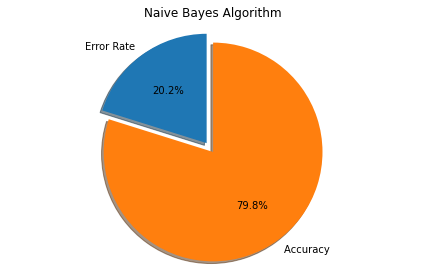

2.Linear SVC :

Confusion Matrix :
[[1744  266]
 [1377 8531]]
Accuracy Is : 86.21412988756502 %
Error Rate Is : 13.785870112434978 %
Precision Is : 96.97624190064795 %
Recall Is : 86.10213968510296 %




/Users/pavanmarella/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


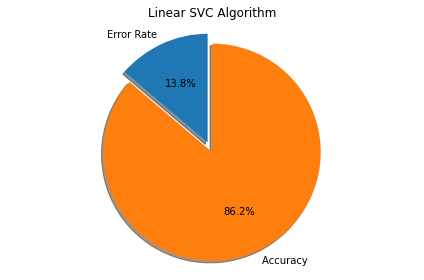

3.K-Nearest Neighbors  :

Confusion Matrix :
[[ 205 1865]
 [ 710 9269]]
Accuracy Is : 78.62893186156528 %
Error Rate Is : 21.371068138434723 %
Precision Is : 83.24950601760374 %
Recall Is : 92.88505862310853 %




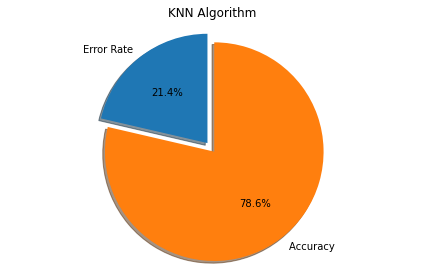

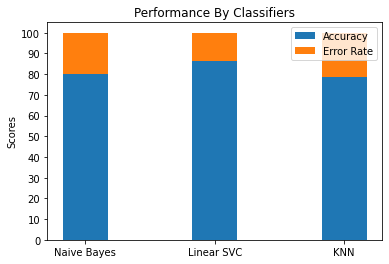

In [ ]:
root = tk.Tk()
root.title("Twitter Fake Account Detector")
root.grid_columnconfigure(0, weight=1)
root.geometry("600x500")
root.resizable(0, 0)

tk.Label(root, 
		 text="Fake Account Detector",
		 fg = "lightgrey",
		 bg = "limegreen",
		 width=400,
		 height=2,
		 font = "Arial 35 bold italic").pack()
		 
browsebutton = tk.Button(root, 
                   text="Browse File", 
                   fg="lightsalmon3",
                   bg="lightyellow1",
                   width=45,
                   height=2,
                   font = "Arial 15 bold italic",
                   command=browse,
                   )
browsebutton.pack(padx=0,pady=10)

tk.Label(root, 
		 text="Classifiers ",
		 fg = "lightskyblue1",
		 bg = "orchid4",
		 width=40,
		 height=1,
		 font = "Arial 30 bold italic").pack(padx=0,pady=0)

Manual_Input_Button = tk.Button(root, 
                   text="Give Manual Input",
                   fg="black",
                   bg="blue",
                   width=35,
                   height=2,
                   font = "Arial 15 bold italic",
                   command=Create_Input_Window,
                   ) 
Manual_Input_Button.place(relx=0.2, rely=0.50) 

Naive_Bayes_button = tk.Button(root, 
                   text="Naive Bayes", 
                   fg="black",
                   bg="light steel blue",
                   width=25,
                   height=2,
                   command=Naive_Bayes,
                   font = "Helvetica 10 bold italic",
                   )                 
Naive_Bayes_button.pack( side=tk.LEFT)

Linear_Svc_Button = tk.Button(root, 
                   text="Linear SVC",
                   fg="black",
                   bg="misty rose",
                   width=25,
                   height=2,
                   font = "Helvetica 10 bold italic",
                   command=Linear_Svc,
                   )                 
Linear_Svc_Button.pack(side=tk.LEFT)

KNN_button = tk.Button(root, 
                   text="KNN",
                   fg="black",
                   bg="salmon1",
                   width=25,
                   height=2,
                   font = "Helvetica 10 bold italic",
                   command=Knn,
                   )  
KNN_button.pack( side=tk.LEFT)

All_statistics_Button = tk.Button(root, 
                   text="Compare",
                   fg="black",
                   bg="aquamarine2",
                   width=35,
                   height=2,
                   font = "Helvetica 10 bold italic",
                   command=compare,
                   ) 
All_statistics_Button.place(relx=0.25, rely=0.9)                
root.mainloop()